In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import os
import matplotlib
import matplotlib.patches as patches

matplotlib.rcParams.update({'errorbar.capsize': 4})


In [8]:
Filters = \
    {
        1:  (438,28),
        2:  (472,35),
        3:  (500,29),
        4:  (527,22),
        5:  (549,21),
        6:  (561,21),
        7:  (586,26),
        8:  (605,22),
        9: (631,28),
        10: (661,26),
        11: (692,47),
        12:  (np.NaN,np.NaN)
    }
Filter_QE = \
    {
     1:     0.52654585,
     2:     0.61510198,
     3:     0.67157561,
     4:     0.70026282,
     5:     0.71884383,
     6:     0.72505143,
     7:     0.7279477,
     8:     0.72530424,
     9:    0.71414267,
     10:    0.68976776,
     11:    0.6438945 
    }
    

In [ ]:
filtAv = [438, 472, 500, 527, 549, 561, 568, 605, 631, 661, 692]

filtUn = np.array([28, 35, 29, 22, 21, 21, 26, 22, 28, 26, 47]) / 2
filtQE = np.array([0.52654585, 0.61510198, 0.67157561, 0.70026282, 0.71884383, 0.72505143, 0.7279477, 0.72530424, 0.71414267, 0.68976776, 0.6438945])

In [34]:
roi = [200, 1648, 600, 2048]

# Analysis Bromobimane on fused silica

### Functions

In [44]:
def prepare_spectrum(files, roi):
    nfilt = len(files)
    
    img = io.imread(files[0]).astype(np.int64)
    imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
    roiSize = imroi.shape[0] * imroi.shape[1]
    offset = 100 * roiSize

    avInt = []
    unInt = []
    for i in range(nfilt-1):
        img = io.imread(files[i]).astype(np.int64)
        imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
        intPx = (imroi.sum() - offset) / roiSize
        avInt.append(intPx)
        
        unPx = np.sqrt((imroi**2).sum()) / roiSize
        unInt.append(unPx)

    avInt = np.array(avInt)
    unInt = np.array(unInt)
    cntQe = avInt / filtQE
    # cntQe /= (filtUn*2)

    unInt /= filtQE
    # unInt /= (filtUn*2)


    return cntQe, unInt

## Sample FS7: 1e-7 M

### Texp = 1 s, measurement 2

20/08/2024

File 0: T_exp = 1 s

File 1: T_exp = 10 s

File 2: T_exp = 1 s at fresh location

Continued next day. Stored all clean samples in vacuum.

21/08/2024

File: G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FS7_Bromob_1e-7

File 0: T_exp = 10 s at fresh location

In [42]:
lb = ['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 10 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2']

In [29]:
path20 = 'G:\My Drive\Ba Tagging\data\img\sets\\01-09-24\\FS6_Bromob_1e-6'
subdirs = [x[0] for x in os.walk(path)][1:]
for d in subdirs:
    files = glob(d+'\*.tif')
    print(files)

['G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-NA_Width-NA_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-438nm_Width-28nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-472nm_Width-35nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-500nm_Width-29nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-527nm_Width-22nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-549nm_Width-21nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-561nm_Width-21nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-586nm_Width-26nm_15-15-09.tif', 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\01-09-24\\FS6_Bromob_1e-6\\0\\Center-605nm_Width-22nm_15

In [37]:
path20 = 'G:\My Drive\Ba Tagging\data\img\sets\\20-08-24\\FS7_Bromob_1e-7\\'

files70 = glob(path20+'0/*.tif')
files70.sort()

files71 = glob(path20+'1/*.tif')
files71.sort()

files72 = glob(path20+'2/*.tif')
files72.sort()

path21 = 'G:\My Drive\Ba Tagging\data\img\sets\\21-08-24\\FS7_Bromob_1e-7\\'

files73 = glob(path21+'0/*.tif')
files73.sort()

In [38]:
files70

['G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-438nm_Width-28nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-472nm_Width-35nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-500nm_Width-29nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-527nm_Width-22nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-549nm_Width-21nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-561nm_Width-21nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-586nm_Width-26nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-605nm_Width-22nm_16-49-48.tif',
 'G:\\My Drive\\Ba Tagging\\data\\img\\sets\\20-08-24\\FS7_Bromob_1e-7\\0\\Center-631nm_

In [45]:
c70, un70 = prepare_spectrum(files70, roi)
c71, un71 = prepare_spectrum(files71, roi)
c72, un72 = prepare_spectrum(files72, roi)
c73, un73 = prepare_spectrum(files73, roi)


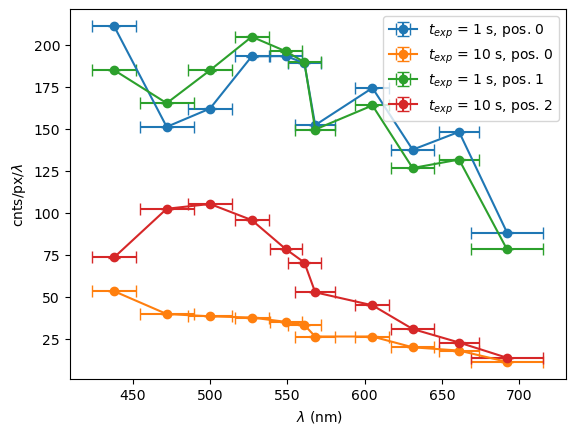

In [46]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='o-', label=lb[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c71/(filtUn*2), yerr=un71/(filtUn*2), fmt='o-', label=lb[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c72/(filtUn*2), yerr=un72/(filtUn*2), fmt='o-', label=lb[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c73/(filtUn*2), yerr=un73/(filtUn*2), fmt='o-', label=lb[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

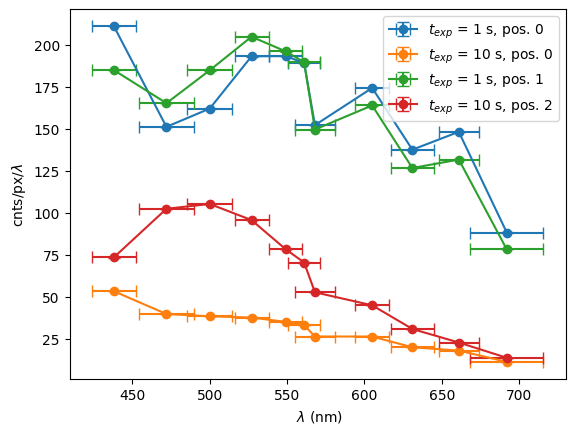

In [ ]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='o-', label=lb[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c71/(filtUn*2), yerr=un71/(filtUn*2), fmt='o-', label=lb[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c72/(filtUn*2), yerr=un72/(filtUn*2), fmt='o-', label=lb[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c73/(filtUn*2), yerr=un73/(filtUn*2), fmt='o-', label=lb[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

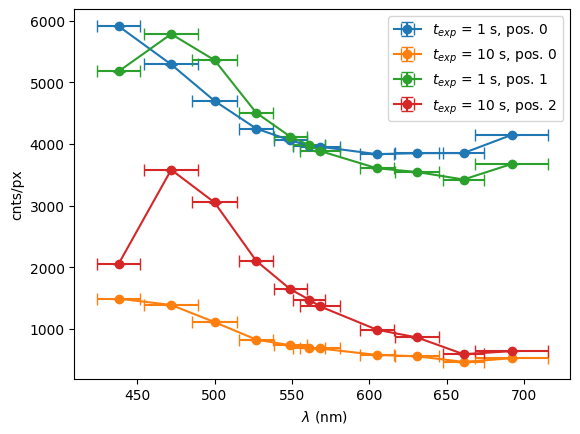

In [ ]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c70, yerr=un70, fmt='o-', label=lb[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c71, yerr=un71, fmt='o-', label=lb[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c72, yerr=un72, fmt='o-', label=lb[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c73, yerr=un73, fmt='o-', label=lb[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px')
plt.legend()

<ErrorbarContainer object of 3 artists>

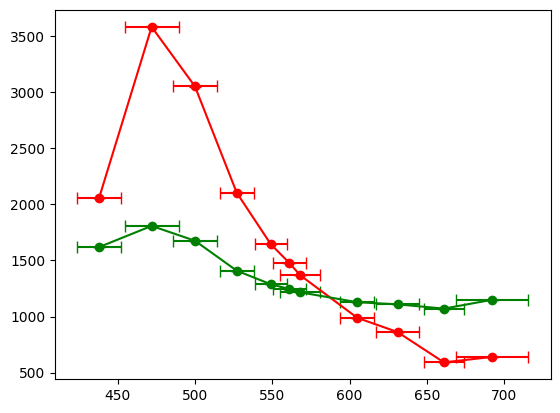

In [125]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c73, yerr=un73, fmt='ro-', label=lb[3])
plt.errorbar(x = filtAv, xerr=filtUn, y = c72/3.2, yerr=un72/3.2, fmt='go-', label=lb[2])

## Sample FS6: 1e-6 M

21/08/2024

FS6 sample: clean Fused silica + spin-coating Bromobimane 1e-6 M

The solvent (metOH) mostly disappeared so we added more (40 uL), the concentration is therefore not known exactly. The solution was deposited on a clean sample which was stored overnight in vacuum. Again, the Eppendorf did not contain 12.5 uL, since it depleted and the pipette absorbed air.

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FS6_Bromob_1e-6

File 0: T_exp = 1 s

File 1: T_exp = 1 s at fresh location

File 2: T_exp = 10 s at same location

File 3: T_exp = 10 s at fresh location

File 4: T_exp = 1 s, time evolution

In [142]:
lb6 = ['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2']
 

In [139]:
pathSS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/'

files60 = glob(pathSS+'0/*.tif')
files60.sort()

files61 = glob(path216+'1/*.tif')
files61.sort()

files62 = glob(pathSS+'2/*.tif')
files62.sort()

files63 = glob(pathSS+'3/*.tif')
files63.sort()

In [159]:
c60, un60 = prepare_spectrum(files60, roi)
c61, un61 = prepare_spectrum(files61, roi)
c62, un62 = prepare_spectrum(files62, roi)
c63, un63 = prepare_spectrum(files63, roi)

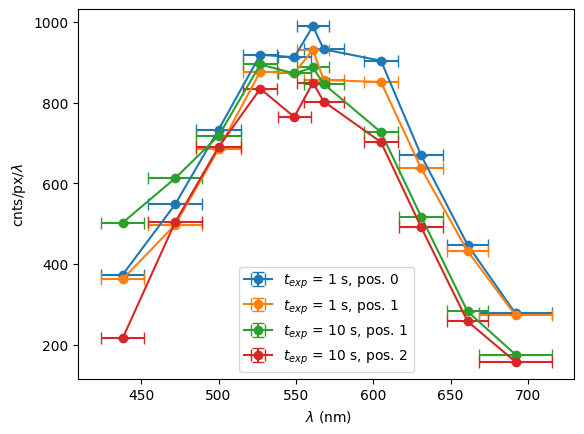

In [160]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c61/(filtUn*2), yerr=un61/(filtUn*2), fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c62/(filtUn*2), yerr=un62/(filtUn*2), fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c63/(filtUn*2), yerr=un63/(filtUn*2), fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

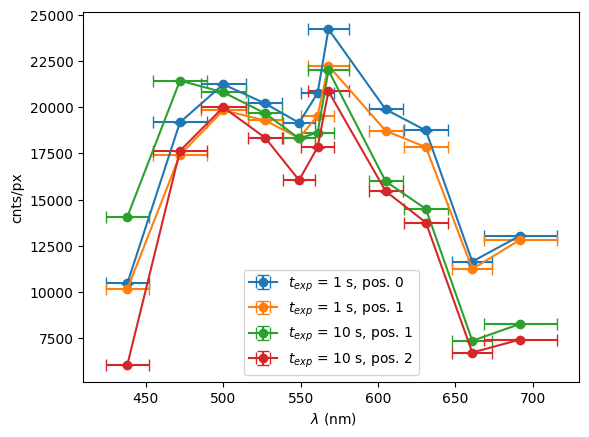

In [161]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60, yerr=un60, fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = c61, yerr=un61, fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = c62, yerr=un62, fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = c63, yerr=un63, fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px')
plt.legend()

## Clean FS + solvent only

Solvent only (MetOH)

G:\My Drive\Ba Tagging\data\img\sets\21-08-24\FSS_MetOH

File 0: T_exp = 1 s

File 1: T_exp = 1 s at fresh location

File 2: T_exp = 10 s at fresh location

File 3: T_exp = 10 s at fresh location

In [187]:
pathSS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FSS_MetOH/'

filesS0 = glob(pathSS+'0/*.tif')
filesS0.sort()

filesS1 = glob(pathSS+'1/*.tif')
filesS1.sort()

filesS2 = glob(pathSS+'2/*.tif')
filesS2.sort()

filesS3 = glob(pathSS+'3/*.tif')
filesS3.sort()

In [188]:
cS0, unS0 = prepare_spectrum(filesS0, roi)
cS1, unS1 = prepare_spectrum(filesS1, roi)
cS2, unS2 = prepare_spectrum(filesS2, roi)
cS3, unS3 = prepare_spectrum(filesS3, roi)

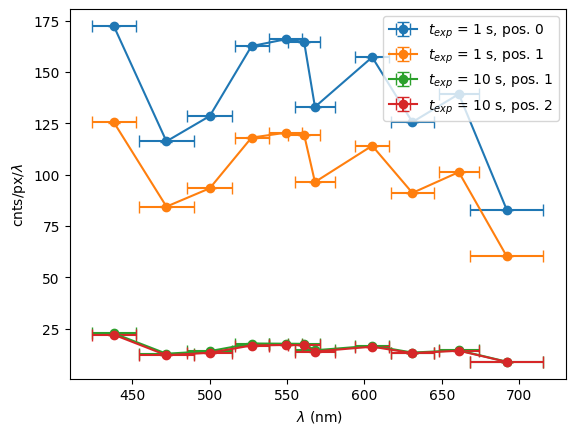

In [189]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS1/(filtUn*2), yerr=unS1/(filtUn*2), fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cS2/(filtUn*2), yerr=unS2/(filtUn*2), fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS3/(filtUn*2), yerr=unS3/(filtUn*2), fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

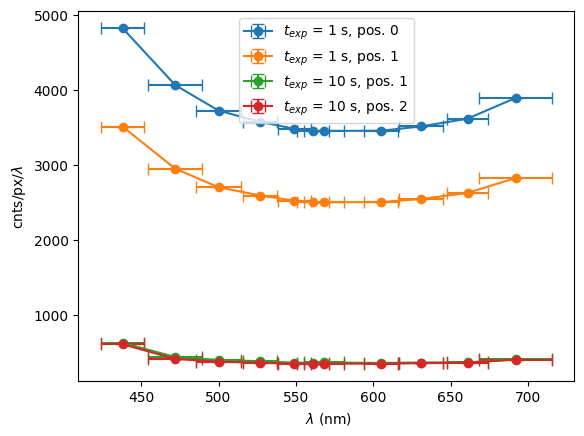

In [190]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cS0, yerr=unS0, fmt='o-', label=lb6[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS1, yerr=unS1, fmt='o-', label=lb6[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cS2, yerr=unS2, fmt='o-', label=lb6[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cS3, yerr=unS3, fmt='o-', label=lb6[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

## Clean FS

FS2 sample: baked fused silica

Baked for 4h at 300 deg. Measured immediately after

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

Path: G:\My Drive\Ba Tagging\data\img\sets\20-08-24\FS2_FusedSilica_baked

Note: moved the data to directory 19-08-24\FS2_FusedSilica_baked for convenience

File 0: T_exp = 1 s

File 1: T_exp = 10 s

FS3 sample: baked fused silica + UV (baseline cleanliness)

Baked for 4h at 300 deg. 30 min UV cleaning. Measured immediately after

P = 460 uW at the sample. P_LED = 3.49 mW (I_LED = 34.1 mA)

Path: G:\My Drive\Ba Tagging\data\img\sets\20-08-24\FS3_FusedSilica_bakedUV

Note: moved the data to directory 19-08-24\FS3_FusedSilica_bakedUV for convenience

File 0: T_exp = 1 s

File 1: T_exp = 10 s

In [214]:
pathFS = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/'

filesF0 = glob(pathFS+'0/*.tif')
filesF0.sort()

filesF1 = glob(pathFS+'1/*.tif')
filesF1.sort()

pathFSUV = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS3_FusedSilica_bakedUV/'

filesF2 = glob(pathFSUV+'0/*.tif')
filesF2.sort()

filesF3 = glob(pathFSUV+'1/*.tif')
filesF3.sort()

In [216]:
filesF1

['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-438nm_Width-28nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-472nm_Width-35nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-500nm_Width-29nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-527nm_Width-22nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/20-08-24/FS2_FusedSilica_bake/1/Center-549nm_Width-21nm_16-01-57.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba T

In [217]:
cF0, unF0 = prepare_spectrum(filesF0, roi)
cF1, unF1 = prepare_spectrum(filesF1, roi)
cF2, unF2 = prepare_spectrum(filesF2, roi)
cF3, unF3 = prepare_spectrum(filesF3, roi)

In [222]:
lbFS = ['Bake, $t_{exp}$ = 1 s', 'Bake, $t_{exp}$ = 10 s', 'Bake + UV, $t_{exp}$ = 1 s', 'Baked + UV $t_{exp}$ = 10 s']
['$t_{exp}$ = 1 s, pos. 0', '$t_{exp}$ = 1 s, pos. 1', '$t_{exp}$ = 10 s, pos. 1', '$t_{exp}$ = 10 s, pos. 2'];

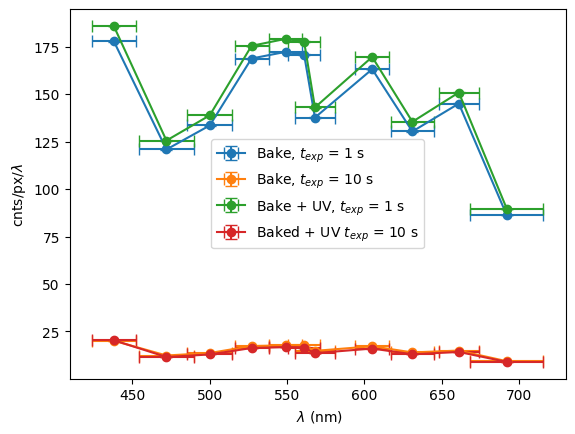

In [221]:
plt.errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), fmt='o-', label=lbFS[0])
plt.errorbar(x = filtAv, xerr=filtUn, y = cF1/(filtUn*2), yerr=unF1/(filtUn*2), fmt='o-', label=lbFS[1] )
plt.errorbar(x = filtAv, xerr=filtUn, y = cF2/(filtUn*2), yerr=unF2/(filtUn*2), fmt='o-', label=lbFS[2])
plt.errorbar(x = filtAv, xerr=filtUn, y = cF3/(filtUn*2), yerr=unF3/(filtUn*2), fmt='o-', label=lbFS[3])
plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$')
plt.legend()

## Compare all samples

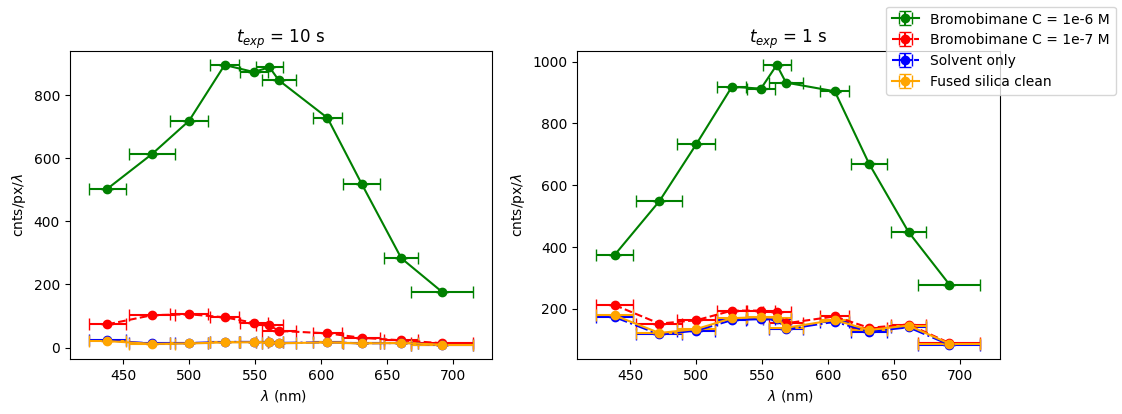

In [246]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].errorbar(x = filtAv, xerr=filtUn, y = c62/(filtUn*2), yerr=un62/(filtUn*2), fmt='go-', label='Bromobimane C = 1e-6 M')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = c73/(filtUn*2), yerr=un73/(filtUn*2), fmt='ro--', label='Bromobimane C = 1e-7 M')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = cS2/(filtUn*2), yerr=unS2/(filtUn*2), fmt='bo-.', label='Solvent only')
ax[0].errorbar(x = filtAv, xerr=filtUn, y = cF3/(filtUn*2), yerr=unF3/(filtUn*2), color='orange', fmt='o-', label='Fused silica clean')
ax[0].set(title ='$t_{exp}$ = 10 s')

ax[1].errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='go-', )
ax[1].errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='ro--',)
ax[1].errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='bo-.', )
ax[1].errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), color='orange', fmt='o-', )
ax[1].set(title ='$t_{exp}$ = 1 s')
ax[0].set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='linear')
ax[1].set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='linear')

fig.legend()


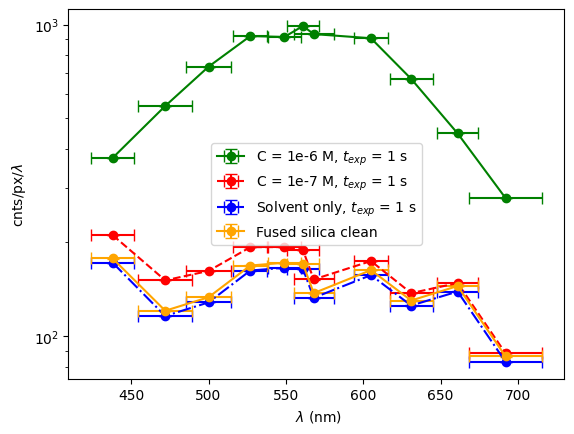

In [232]:
plt.errorbar(x = filtAv, xerr=filtUn, y = c60/(filtUn*2), yerr=un60/(filtUn*2), fmt='go-', label='C = 1e-6 M, $t_{exp}$ = 1 s')
plt.errorbar(x = filtAv, xerr=filtUn, y = c70/(filtUn*2), yerr=un70/(filtUn*2), fmt='ro--', label='C = 1e-7 M, $t_{exp}$ = 1 s')

plt.errorbar(x = filtAv, xerr=filtUn, y = cS0/(filtUn*2), yerr=unS0/(filtUn*2), fmt='bo-.', label='Solvent only, $t_{exp}$ = 1 s')
plt.errorbar(x = filtAv, xerr=filtUn, y = cF0/(filtUn*2), yerr=unF0/(filtUn*2), color='orange', fmt='o-', label='Fused silica clean')

plt.gca().set(xlabel=' $\lambda$ (nm)', ylabel='cnts/px/$\lambda$', yscale='log')
plt.legend()


## Example of images, ROI and histogram

### FS7, file 2

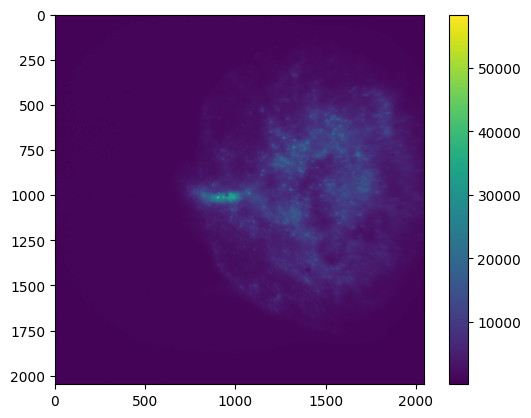

In [165]:
img = io.imread(files72[11]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

(1448, 1448)


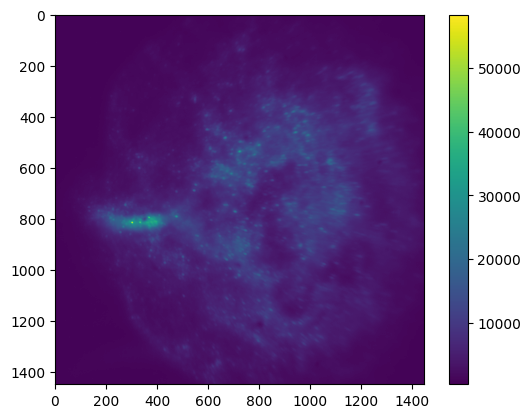

In [166]:
roi = [200, 1648, 600, 2048]
imroi = img[roi[0]:roi[1], roi[2]:roi[3]]
print(imroi.shape)
plt.imshow(imroi)
plt.colorbar()

[None]

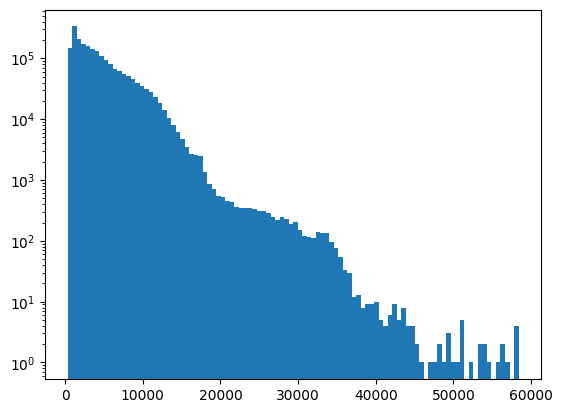

In [167]:
plt.hist(np.array(imroi).flatten(), bins=100);
plt.gca().set(yscale= 'log')#, xlim = (0, 1e4))


### FS6, file 2

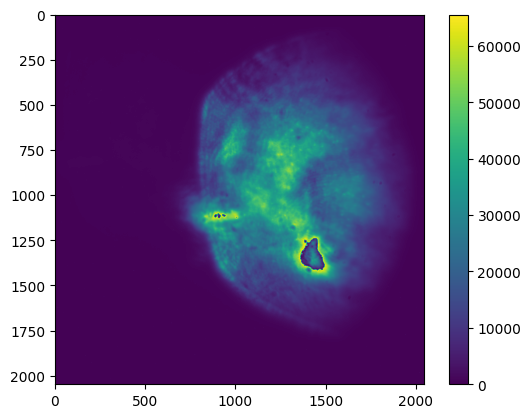

In [176]:
img = io.imread(files62[1]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

### FS6, file 0

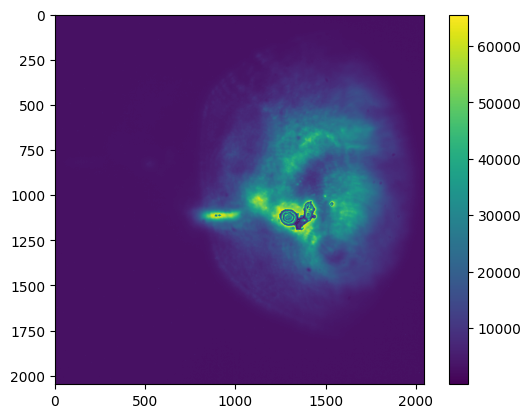

In [178]:
img = io.imread(files60[1]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

## Time runs

In [248]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/4/time_run'
filetime6 = glob(path+'/*.tif')
filetime6.sort()
len(filetime6)

400

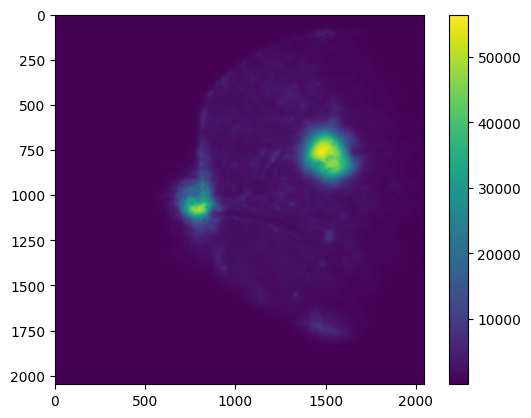

In [324]:
img = io.imread(filetime6[350]).astype(np.int32)
plt.imshow(img, )#clim=(1e4,5e4) )
plt.colorbar()

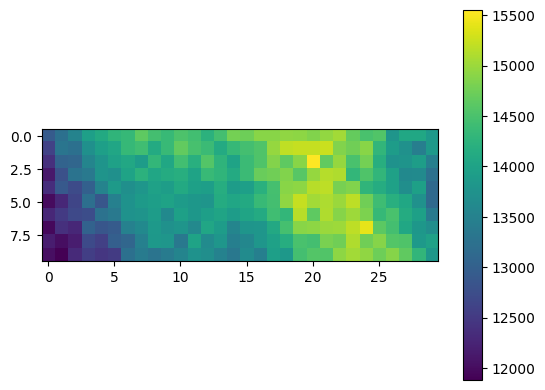

In [254]:
roit = [1250, 1260, 1220, 1250]
imroit = img[roit[0]:roit[1], roit[2]:roit[3]]
plt.imshow(imroit, )#clim=(1e4,5e4) )
plt.colorbar()

In [301]:
trajmat = np.zeros_like(imroit)
k, l = 1, 3

i, j = 1250 + k, 1220 + l

inds = [[1251, 1235], [1251, 1240], [1258, 1220], [1258, 1240]]
trajmat = np.zeros((4, 400))



for n,k in enumerate(inds):
    print(k)
    traij = []
    for f in filetime6:
        px = io.imread(f).astype(np.int32)[k[0], k[1]]
        traij.append(px)

    trajmat[n] = traij


[1251, 1235]
[1251, 1240]
[1258, 1220]
[1258, 1240]


[Text(0.5, 0, 'time (s)'), Text(0, 0.5, 'Counts/pixel')]

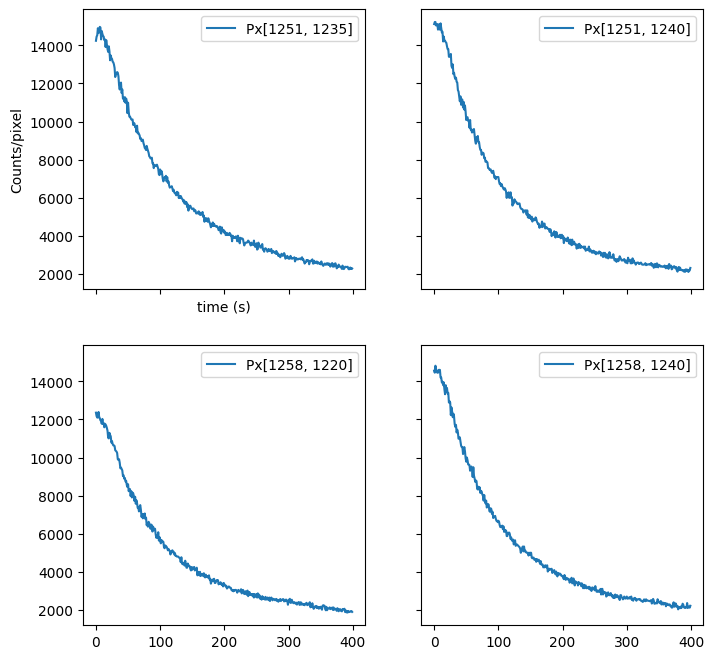

In [312]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True, sharex=True)
ax[0,0].plot(trajmat[0], label='Px'+str(inds[0]))
ax[0,1].plot(trajmat[1], label='Px'+str(inds[1]))
ax[1,0].plot(trajmat[2], label='Px'+str(inds[2]))
ax[1,1].plot(trajmat[3], label='Px'+str(inds[3]))

for a in ax:
    for b in a: b.legend()
ax[0, 0].set(xlabel='time (s)', ylabel='Counts/pixel')
# ax[1].set(xlabel='time (s)', title='Pixel (1257, 1223)')

## Time run FS6

In [ ]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/21-08-24/FS6_Bromob_1e-6/4/time_run'
filetime6 = glob(path+'/*.tif')
filetime6.sort()
len(filetime6)

400

## Time run low power

In [2]:
roi = [1000, 1100, 1400, 1500]
N = 400

def temporal_evolution(files,N=400,roi=[0,512,0,512]):
    im0 = io.imread(files[0]).astype(np.int64)[roi[0]:roi[1], roi[2]:roi[3]]
    data0=np.zeros_like(im0)
    data=np.stack((data0,im0))
    for i in range (2,N):
        d=io.imread(files[i]).astype(np.int64)[roi[0]:roi[1], roi[2]:roi[3]]
        data=np.append(data,[d],axis=0)
    data=np.delete(data,0,0)
    return data

def average_tevol(data):
    I, J = np.shape(data[0])
    av_evol = np.zeros_like(data[:, 0, 0])
    for i in range(I):
        for j in range(J):
            av_evol2 += data[:, i, j]
    av_evol = av_evol/(I*J)

    return av_evol

In [3]:
path ='G:/My Drive/Ba Tagging/data/img/singles/03-09-24/FS6_Bromob_1e-6'
filetime = glob(path+'/*.tif')
filetime.sort()
len(filetime)

400

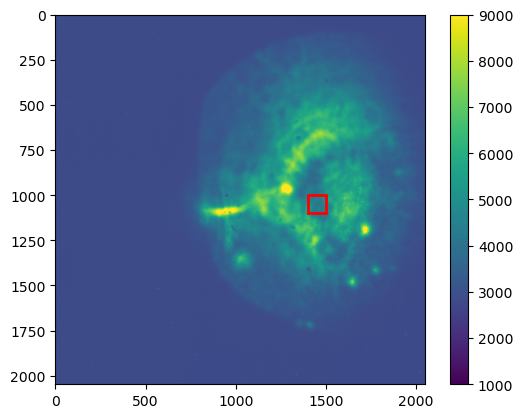

In [14]:
roi = [1000, 1100, 1400, 1500]
img = io.imread(filetime[0]).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
plt.gca().add_patch(rect)

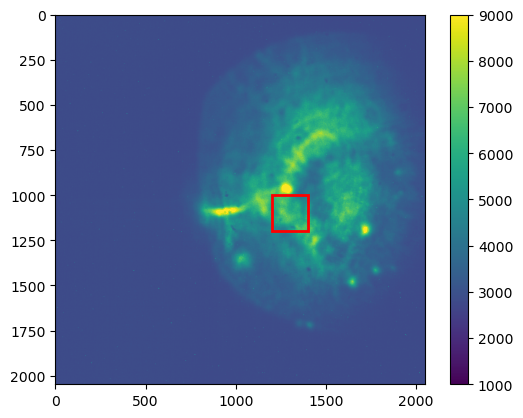

In [13]:
roi = [1000, 1200, 1200, 1400]
img = io.imread(filetime[0]).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
plt.gca().add_patch(rect)

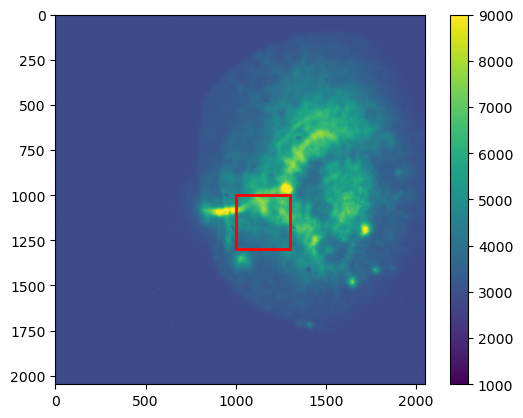

In [15]:
roi = [1000, 1300, 1000, 1300]
img = io.imread(filetime[0]).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
plt.gca().add_patch(rect)

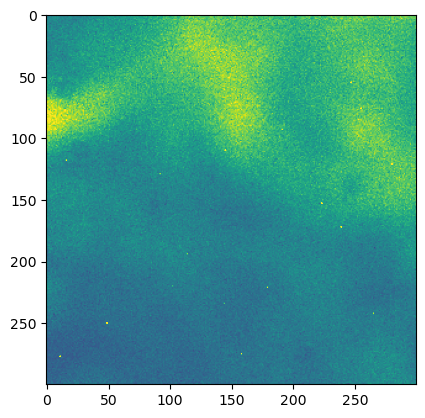

In [16]:
imroip = img[roi[0]:roi[1], roi[2]:roi[3]]
plt.imshow(imroip,  clim=(1e3,9e3) )

In [17]:
data = temporal_evolution(filetime, N, roi)

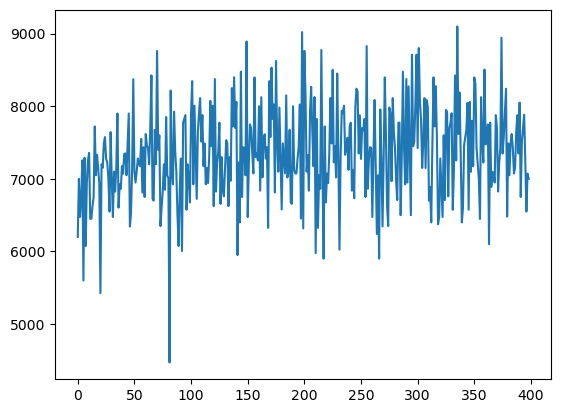

In [93]:
plt.plot(data[:,15,20])

In [44]:
av_evol[k]

4535.46

In [18]:
I, J = np.shape(data[0])
av_evol = np.zeros_like(data[:, 0, 0])
for i in range(I):
    for j in range(J):
        av_evol += data[:, i, j]
av_evol = av_evol/(I*J)

[(5000.0, 6500.0), Text(0.5, 0, 't (s)'), Text(0, 0.5, 'I/px')]

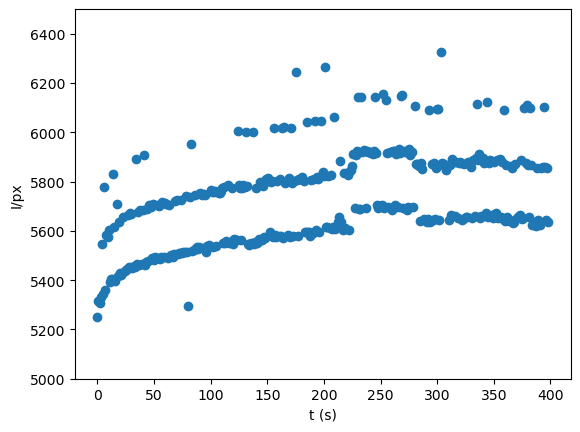

In [25]:
plt.plot(av_evol, 'o')
plt.gca().set(ylim=(5000, 6500), xlabel='t (s)', ylabel='I/px')

[(5800.0, 7000.0), Text(0.5, 0, 't (s)'), Text(0, 0.5, 'I/px')]

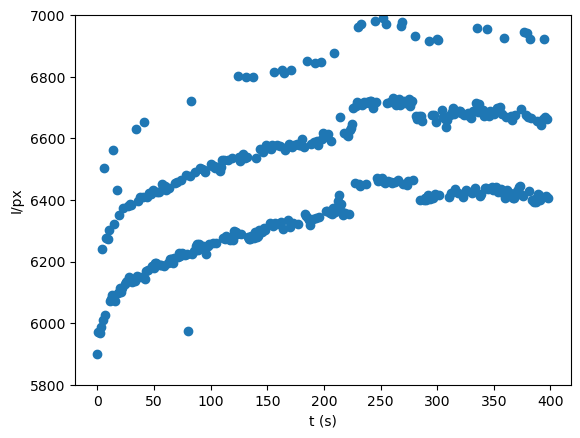

In [ ]:
plt.plot(av_evol, 'o')
plt.gca().set(ylim=(5800, 7000), xlabel='t (s)', ylabel='I/px')

[(4500.0, 5500.0)]

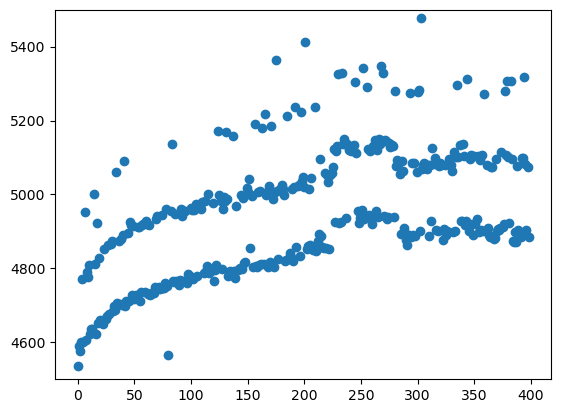

In [ ]:
plt.plot(av_evol, 'o')
plt.gca().set(ylim=(4500, 5500))

### Time run with dark images 
(no laser, collection path blinded, lights off)

In [26]:
path ='G:/My Drive/Ba Tagging/data/img/singles/08-09-24/Dark_images'
filetime = glob(path+'/*.tif')
filetime.sort()
len(filetime)

400

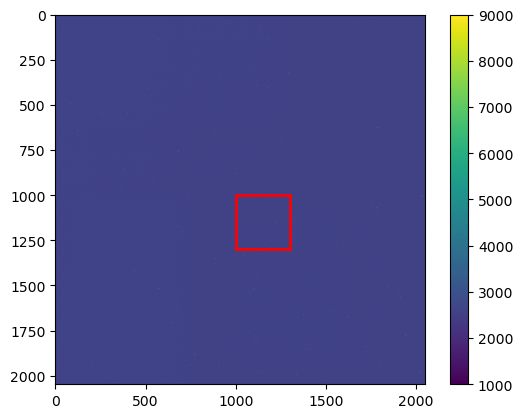

In [29]:
roi = [1000, 1300, 1000, 1300]
img = io.imread(filetime[0]).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
plt.gca().add_patch(rect)

In [30]:
data = temporal_evolution(filetime, N, roi)

I, J = np.shape(data[0])
av_evol = np.zeros_like(data[:, 0, 0])
for i in range(I):
    for j in range(J):
        av_evol += data[:, i, j]
av_evol = av_evol/(I*J)

[(2500.0, 2900.0),
 Text(0.5, 0, 't (s)'),
 Text(0, 0.5, 'I/px'),
 Text(0.5, 1.0, 'Dark images')]

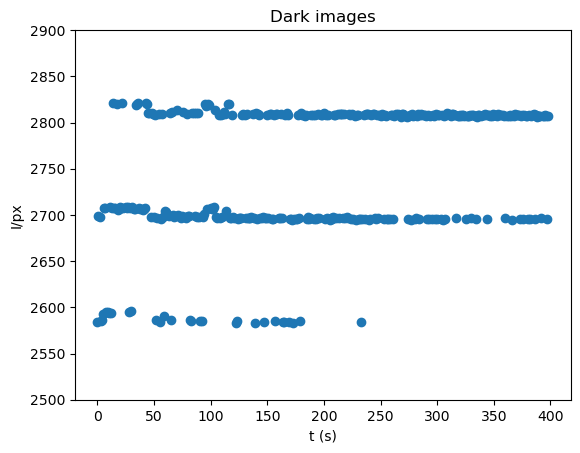

In [35]:
plt.plot(av_evol, 'o')
plt.gca().set(ylim=(2500, 2900), xlabel='t (s)', ylabel='I/px', title='Dark images')

### Test in corners only

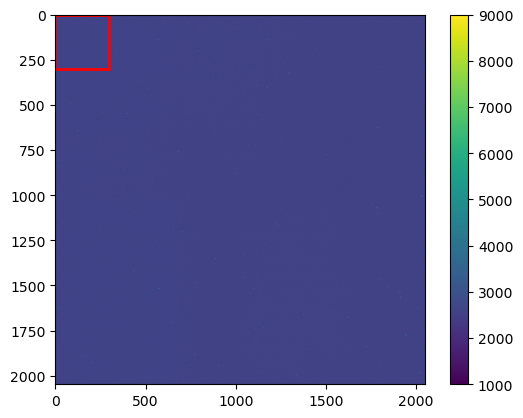

In [40]:
roi2 = [0, 300, 0, 300]
img = io.imread(filetime[0]).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
plt.gca().add_patch(rect)

In [41]:
data2 = temporal_evolution(filetime, N, roi2)

I, J = np.shape(data[0])
av_evol2 = np.zeros_like(data[:, 0, 0])
for i in range(I):
    for j in range(J):
        av_evol2 += data2[:, i, j]
av_evol2 = av_evol2/(I*J)

[(2500.0, 2900.0),
 Text(0.5, 0, 't (s)'),
 Text(0, 0.5, 'I/px'),
 Text(0.5, 1.0, 'Dark images')]

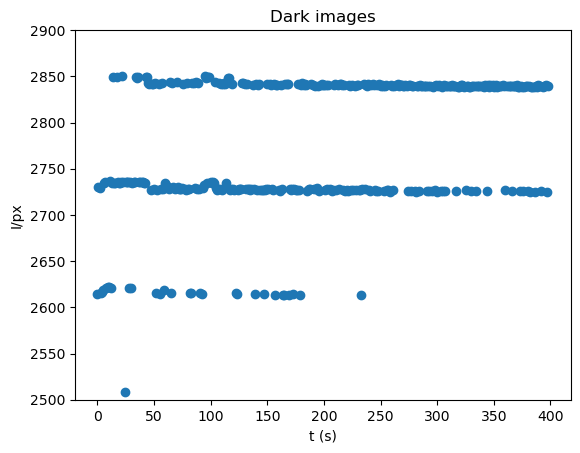

In [38]:
plt.plot(av_evol, 'o')
plt.plot(av_evol2, 'o')
plt.gca().set(ylim=(2500, 2900), xlabel='t (s)', ylabel='I/px', title='Dark images')

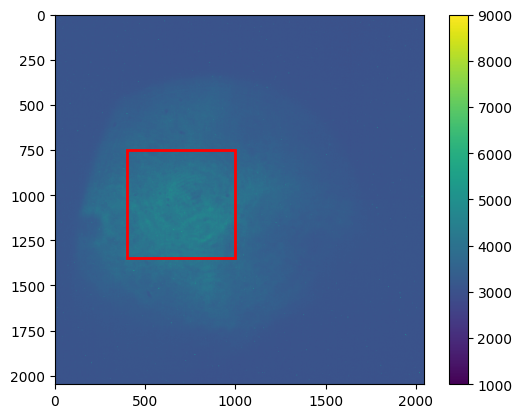

In [11]:
file = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/time_runs/07-10-24/Rhodamine-B 5 µM/1/Center-NA_Width-NA_16-43-39.tif'
roi = [750, 1350, 400, 1000]
img = io.imread(file).astype(np.int32)
plt.imshow(img, clim=(1e3,9e3) )
plt.colorbar()

rect = patches.Rectangle((roi[2], roi[0]),  roi[3]-roi[2], roi[1]-roi[0] , linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

# Read npy

In [1]:
filex = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/numpy/01-09-24/FS6_Bromob_1e-6/3.npy'

In [4]:
image_set_data = np.load(filex)

In [20]:
image_set_data[0][3]

array([[[213, 207, 225, ..., 129, 139, 131],
        [201, 241, 220, ..., 142, 140, 141],
        [215, 235, 207, ..., 166, 147, 149],
        ...,
        [152, 165, 144, ..., 130, 144, 152],
        [148, 159, 161, ..., 160, 152, 121],
        [156, 165, 162, ..., 145, 134, 149]],

       [[118, 117, 124, ..., 126, 114, 118],
        [113, 119, 120, ..., 124, 113, 105],
        [114, 123, 115, ..., 111, 122, 112],
        ...,
        [117, 126, 115, ..., 116, 118, 114],
        [109, 112, 120, ..., 139, 116, 120],
        [115, 117, 122, ..., 116, 118, 119]],

       [[131, 137, 131, ..., 129, 125, 117],
        [134, 146, 119, ..., 129, 117, 109],
        [145, 135, 123, ..., 114, 117, 112],
        ...,
        [125, 125, 125, ..., 118, 118, 128],
        [127, 127, 125, ...,  77, 122, 124],
        [112, 122, 123, ..., 111, 123, 116]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0